# Logistic Regression for Customer Churn Prediction

In this notebook, i'm going to explore the beauty of logistic regression using `sklearn` library.

### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### Load the Dataset

In [7]:
churn = pd.read_csv(r"c:/users/danhaya/arewads/associate-data-scientist-in-python/data/churn.csv")
churn.columns = churn.columns.str.lower()
churn.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Explore Dataset
let's explore the dataset and drive insight from it by checking at the following:
- shape
- info
- missing value

In [8]:
# shape
print(churn.shape)

(10000, 14)


from this, we can deduce that the dataset has 10,000 rows with only 14 columns.

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

Excellent, the dataset has no missing values (null values)

In [12]:
print(churn['exited'].value_counts())

exited
0    7963
1    2037
Name: count, dtype: int64


From this information, we can understand that seven thousand, nine hundred and sixty three customers did not churn and stayed with the bank while two thousand and thirty seven left the bank.

### Encode Categorical Variables

from the `.info()` methods, we know the categorical variables like, Gender and Geography. now let's encode them.

In [13]:
le = LabelEncoder()
churn['gender'] = le.fit_transform(churn['gender'])

In [14]:
# One-hot encode
churn = pd.get_dummies(churn, columns=['geography'], drop_first=True)


### `Defination of the Features`

In [15]:
X = churn.drop(['rownumber', 'customerid', 'surname', 'exited'], axis = 1)
y = churn['exited']

### `Training and Testing`
let's train the model with 80% of the data and use the remaining 20% for testing the model to see its accuracy.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# train logistic regression model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### `Predictions`
Now, let's test the model and evaluate its accuracy.

In [19]:
y_pred = log_reg.predict(X_test)

In [20]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print ("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.808

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



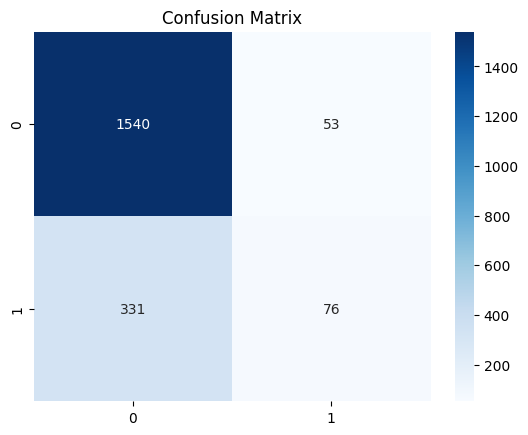

In [22]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [23]:
# ROC-AUC
y_prob = log_reg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC: ", auc)

ROC-AUC:  0.7747778595236223


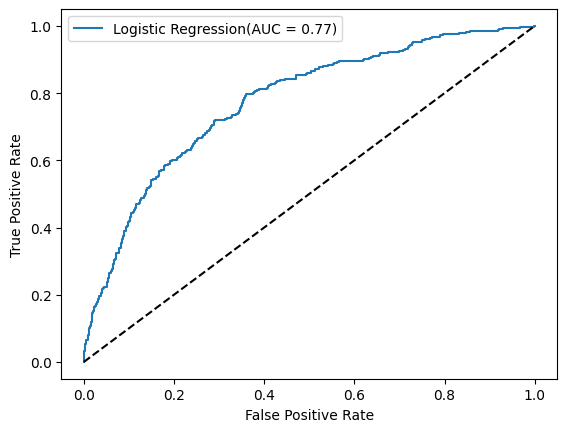

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression(AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()